# Spam Prediction

In [1]:
import pandas as pd
import seaborn as sb
import numpy as np
import pickle
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

In [23]:
data = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [24]:
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


## Data Analysis and Data Precossing
Checking for null and duplicate values and deleting unwanted/duplicate data

In [5]:
data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [6]:
data.duplicated().sum()

403

<Axes: xlabel='v1'>

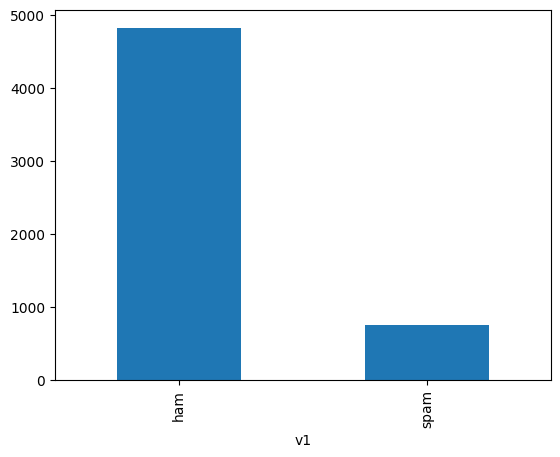

In [7]:
data['v1'].value_counts().plot.bar()

In [8]:
# Dropping unnecessary columns
data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1, inplace=True)
data.drop_duplicates(keep='first', inplace=True)

In [9]:
# Label encoding categorical target variable
le = LabelEncoder()
data['v1'] = le.fit_transform(data['v1'])

## Text Preprocessing
Converting text data into useful/clean data using stemming, stopwords, Bag of words and TF-IDF

In [10]:
# Removing special characters and converting words into their root words
ps = PorterStemmer()
def preprocessText(text):
    text = re.sub('[^A-Za-z0-9]', ' ', text)
    text = text.lower()
    words = nltk.word_tokenize(text)
    stemmed_text = [ps.stem(word) for word in words if word not in set(stopwords.words('english'))]
    return ' '.join(stemmed_text)

data['v2'] = data['v2'].apply(preprocessText)

In [11]:
# Splitting into dependent and independent data
X = data['v2']
y = data['v1']

In [12]:
# Splitting into training and test data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)

# using bag of words
cv = CountVectorizer()
X_train_bow = cv.fit_transform(X_train).toarray()
X_test_bow = cv.transform(X_test).toarray()

# using tf-idf
tf = TfidfVectorizer()
X_train_tf = tf.fit_transform(X_train).toarray()
X_test_tf = tf.transform(X_test).toarray()

## Model Training
Training different models  such as Naive Bayes, Random Forests and Logistic Regression

In [13]:
classifiers = {'nb_bow': MultinomialNB(), 'nb_tf': MultinomialNB(),'rf_bow':RandomForestClassifier(), 'rf_tf': RandomForestClassifier(), 'reg_bow':LogisticRegression(), 'reg_tf':LogisticRegression()}

In [14]:
# Using Multinomial Naive Bayes
classifiers['nb_bow'].fit(X_train_bow, y_train)
classifiers['nb_tf'].fit(X_train_tf,y_train)

# Using Random Forest
classifiers['rf_bow'].fit(X_train_bow, y_train)
classifiers['rf_tf'].fit(X_train_tf, y_train)

# Using Logistic Regression
classifiers['reg_bow'].fit(X_train_bow, y_train)
classifiers['reg_tf'].fit(X_train_tf, y_train)

LogisticRegression()

## Prediction

In [15]:
# Using Multinomial Naive Bayes
y_pred_bow_nb = classifiers['nb_bow'].predict(X_test_bow)
y_pred_tf_nb = classifiers['nb_tf'].predict(X_test_tf)

# Using Random Forest
y_pred_bow_rf = classifiers['rf_bow'].predict(X_test_bow)
y_pred_tf_rf = classifiers['rf_tf'].predict(X_test_tf)

# Using Logistic Regression
y_pred_bow_reg = classifiers['reg_bow'].predict(X_test_bow)
y_pred_tf_reg = classifiers['reg_tf'].predict(X_test_tf)

## Conclusion
Upon seeing the table below, we can see that Naive Bayes Classifier has outperformed all the other classifiers

In [16]:
data = np.array([['','Naive_Bayes_BOW','Naive_Bayes_TFIDF','Random_Forest_BOW', 'Random_Forest_TFIDF', 'Logistic_reg_BOW', 'Logistic_reg_TFIDF'],
                 ['Accuracy_score', round(accuracy_score(y_test, y_pred_bow_nb),4), round(accuracy_score(y_test, y_pred_tf_nb),4), round(accuracy_score(y_test, y_pred_bow_rf),4), round(accuracy_score(y_test, y_pred_tf_rf),4), round(accuracy_score(y_test, y_pred_bow_reg),4), round(accuracy_score(y_test, y_pred_tf_reg),4)],
                 ['Precision', round(precision_score(y_test, y_pred_bow_nb),4), round(precision_score(y_test, y_pred_tf_nb),4), round(precision_score(y_test, y_pred_bow_rf),4), round(precision_score(y_test, y_pred_tf_rf),4), round(precision_score(y_test, y_pred_bow_reg),4), round(precision_score(y_test, y_pred_tf_reg),4)],
                 ['Recall', round(recall_score(y_test, y_pred_bow_nb),4), round(recall_score(y_test, y_pred_tf_nb),4), round(recall_score(y_test, y_pred_bow_rf),4), round(recall_score(y_test, y_pred_tf_rf),4), round(recall_score(y_test, y_pred_bow_reg),4), round(recall_score(y_test, y_pred_tf_reg),4)],
                 ['F1-score', round(f1_score(y_test, y_pred_bow_nb),4), round(f1_score(y_test, y_pred_tf_nb),4), round(f1_score(y_test, y_pred_bow_rf),4), round(f1_score(y_test, y_pred_tf_rf),4), round(f1_score(y_test, y_pred_bow_reg),4), round(f1_score(y_test, y_pred_tf_reg),4)]])
scores = pd.DataFrame(data=data[1:, 1:],columns=data[0,1:], index=data[1:,0])

In [17]:
scores

,Naive_Bayes_BOW,Naive_Bayes_TFIDF,Random_Forest_BOW,Random_Forest_TFIDF,Logistic_reg_BOW,Logistic_reg_TFIDF
Accuracy_score,0.9842,0.959,0.9748,0.9766,0.9771,0.9625
Precision,0.9641,1.0,0.9948,0.9949,0.9851,0.967
Recall,0.9188,0.7009,0.8205,0.8333,0.8462,0.7521
F1-score,0.9409,0.8241,0.8993,0.907,0.9103,0.8462


In [18]:
# Printing classification report for the best model - NB using BOW
print(classification_report(y_test, y_pred_bow_nb))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1472
           1       0.96      0.92      0.94       234

    accuracy                           0.98      1706
   macro avg       0.98      0.96      0.97      1706
weighted avg       0.98      0.98      0.98      1706



In [19]:
# Saving BOW model
with open('./bow.pkl', 'wb') as f:
    pickle.dump(cv, f)

In [20]:
# Saving NB-BOW model
with open('./NB_bow.pkl', 'wb') as f:
    pickle.dump(classifiers['nb_bow'], f)

In [21]:
with open('./ps.pkl', 'wb') as f:
    pickle.dump(ps, f)